# Ace Digital Pre-Screening Test - Question 2

## Question

2. A team of plantation planners are concerned about the yield of oil palm trees, which seems to 
fluctuate. They have collected a set of data and needed help in analysing on how external 
factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of 
oil palm tree determines the FFB yield, and are linked to the external factors. Perform the 
analysis, which requires some study on the background of oil palm tree physiology. 

## Solution

Question for reference:
> Perform the analysis, which requires some study on the background of oil palm tree physiology.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('palm_ffb.csv')
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [4]:
data.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

We can plot the dates and FFB_Yield to see if there is any correlation

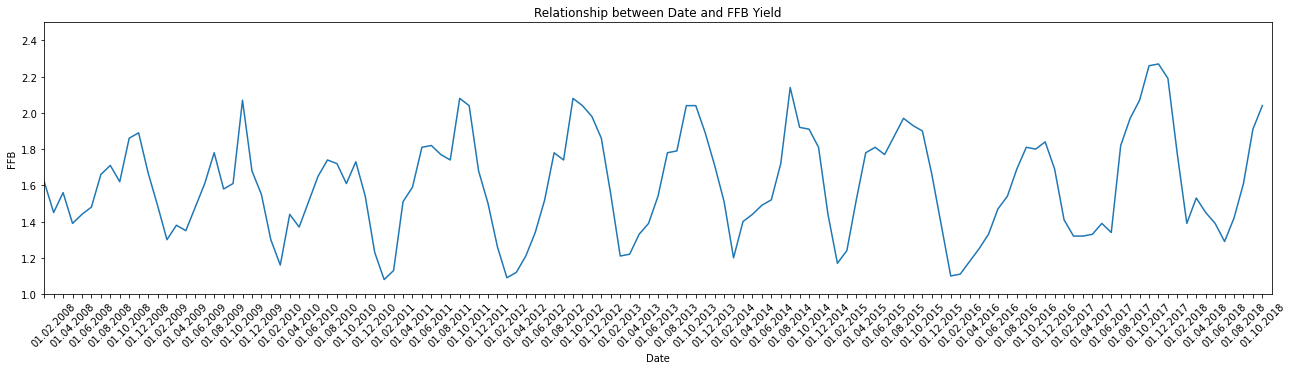

In [5]:
fig, ax = plt.subplots()
ax.plot(data["Date"], data["FFB_Yield"], )

# Labelling 
fig.set_size_inches(22, 5)
ax.set_xlabel("Date")
ax.set_ylabel("FFB")
ax.set_title("Relationship between Date and FFB Yield")
ax = plt.gca()
plt.axis([0,130,1,2.5])
plt.xticks(rotation=45)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)


There appears to be some relation ship between the time of year and the fresh fruit bunch (FFB) yield. Particularly, during the month of August each year, the FFB yield seems to be at it's highest. This means that certain seasons can cause the FFB yield to increase.

We can explore the correlation of FFB Yield and other features in the dataset.

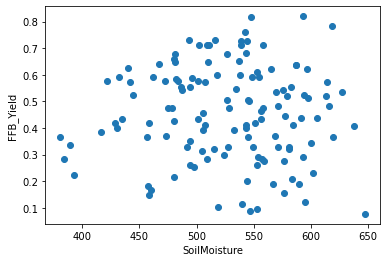

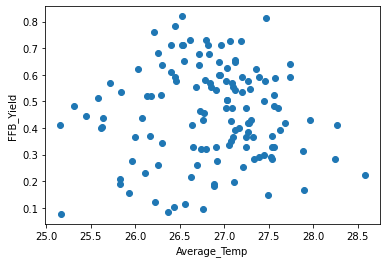

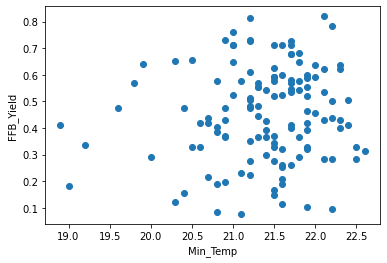

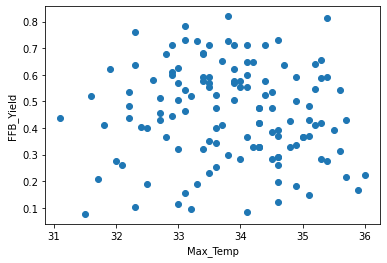

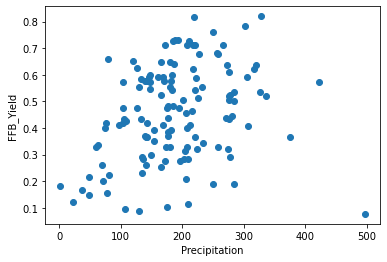

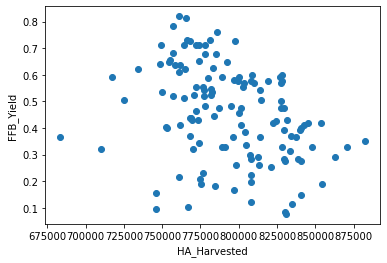

In [6]:
numerical_vars = [var for var in data.columns if data[var].dtypes != 'O']
discrete_vars = [var for var in numerical_vars if len(data[var].unique())<20]
continuous_vars = [var for var in numerical_vars if var not in discrete_vars]

def plot_correlation(data, var):
    data = data.copy()
    data['FFB_Yield'] = np.log(data['FFB_Yield'])
    plt.scatter(data[var], data['FFB_Yield'])
    plt.ylabel('FFB_Yield')
    plt.xlabel(var)
    plt.show()

for x in continuous_vars:
    if x !='FFB_Yield':
        plot_correlation(data, x)

From the scatter plots, it can be seen that there is a linear relationship between FFB_Yield and percipitation, where the FFB yield increases as the percipitation increases.

We should also check the correlation between the discrete variable which is working days.

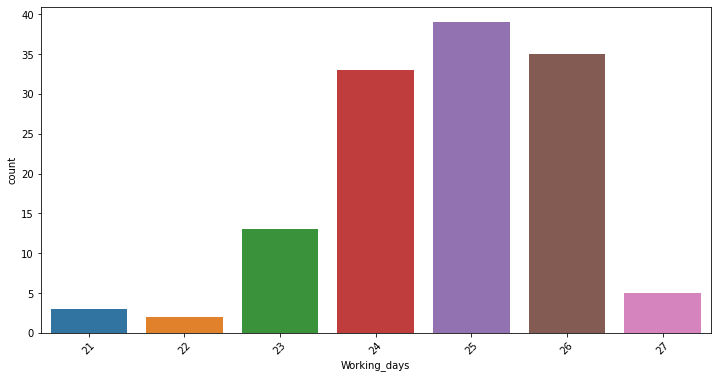

In [7]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Working_days', data = data)
xt = plt.xticks(rotation=45)

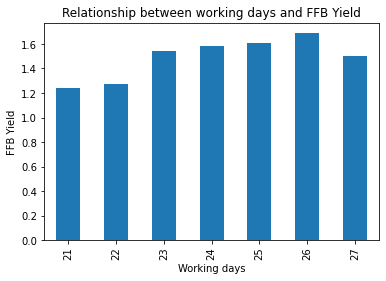

In [8]:
def plot_working_days(data, var):
    data = data.copy()
    data.groupby(var)['FFB_Yield'].median().plot.bar()
    plt.title('Relationship between working days and FFB Yield')
    plt.xlabel('Working days')
    plt.ylabel('FFB Yield')
    plt.show()
    
for x in discrete_vars:
    plot_working_days(data, x)

We can see that working days has a positive effect with the FFB Yield. For all days accept the last which is 27, the FFB yield increases when the working days increases. However, due to the 27 working days having a lower FFB yield than the previous working days, this is not a strong correlation.

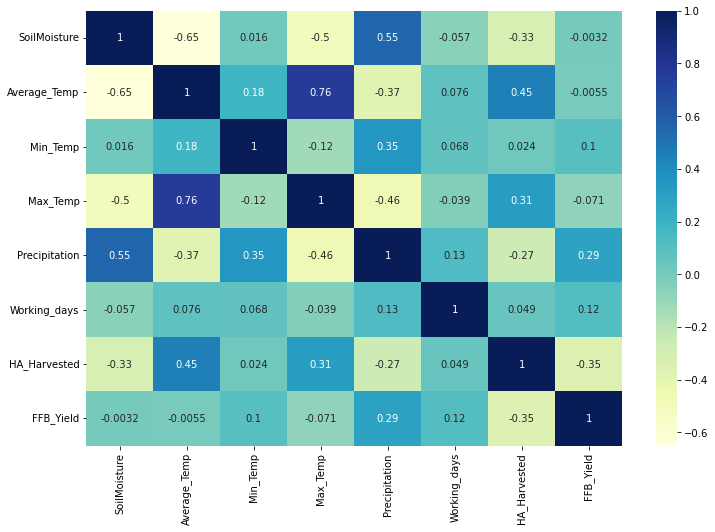

In [9]:
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Perciptation, working days, and the minimum temperature seems to hava a positive correlation on the FFB yield while HA_Harvested seems to have a negative correlation on FFB yield. This results support the observations that we found earlier.

We can also do some feature selection to see which are the most important features. We will use a random forest regressor and find the most important features from there.

In [10]:
X = data.drop(['FFB_Yield', 'Date'],axis=1)
y = data.FFB_Yield  

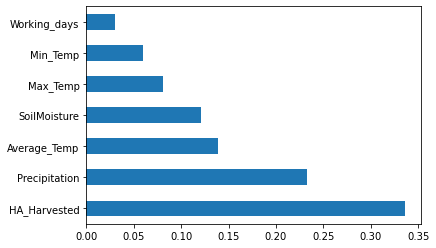

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)
features = pd.Series(rf.feature_importances_, index=X.columns)
features.nlargest(10).plot(kind='barh')
plt.show()

Interestingly, min_temp have one of the lowest importance on the FFB yield. Average_temp, preciptation, and HA_harvested seems to have the strongest importance in influencing the FFB yield.

We can check the relationship between the precipitation and date, as maybe there might be a reason to why certain months have higher FFB yield.

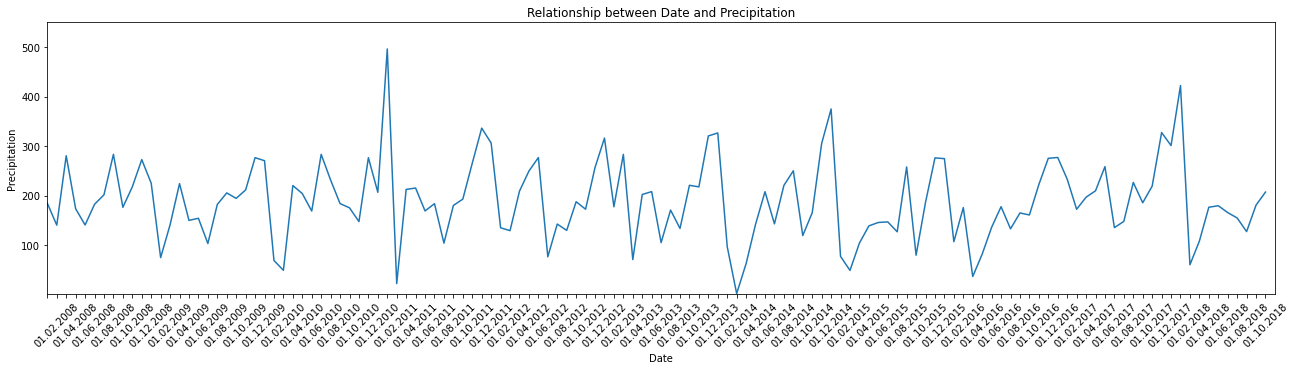

In [12]:
fig, ax = plt.subplots(figsize=(22, 5))
ax.plot(data["Date"], data["Precipitation"])


ax.set_xlabel("Date")
plt.xticks(rotation=45)
ax.set_ylabel("Precipitation")
ax.set_title("Relationship between Date and Precipitation")
ax = plt.gca()
ax.axis([0,130,1,550])
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

There does appear to be some relationship between the date and precipitation. Particularly, during the months of August each year, the precipitation seems to be higher. We can do this comparison side-by-side to see it better.

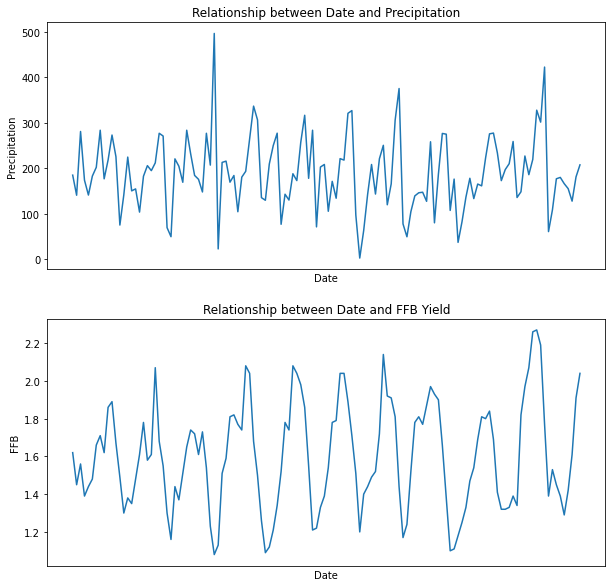

In [13]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
ax0.plot(data["Date"], data["Precipitation"])


ax0.set_xlabel("Date")
ax0.set_ylabel("Precipitation")
ax0.set_title("Relationship between Date and Precipitation")
ax0 = plt.gca()
plt.xticks([])
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
    
ax1.plot(data["Date"], data["FFB_Yield"], )

ax1.set_xlabel("Date")
ax1.set_ylabel("FFB")
ax1.set_title("Relationship between Date and FFB Yield")
ax1 = plt.gca()


Indeed, the months with high FFB yield also have high precipitation and vice versa.

### Conclusion

From the findings above, it seems that the date is definitely the biggest factor in determining the FFB yield as certain months like August do produce higher FFB yields. The reason that the date is influential is probably because different seasons have different weather conditions. After more findings, the percipitation seems to have a high importance when fitting the regression model and also has a strong positive correlation with the FFB yield. This leads me to believe that the dates with the highest FFB yields might have high precipitation as well. After exploring further, that does seem to be the case. 


There are also other findings such as HA_Harvested, which had the highest importance when fitting the random forest regressor and it also had a strong negative correlation with the FFB yield. This means as HA_Harvested increases, the FFB yield decreases.